<a href="https://colab.research.google.com/github/snowwLee/PMNAV/blob/main/%EA%B0%95%EB%82%A8_%EC%82%AC%EA%B3%A0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumBarunGothic')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/KT에이블스쿨/빅프로젝트/2020-2022년 강남 사고.xlsx')

In [ ]:
data.head()

,사고일시,요일,법규위반,노면상태,기상상태
0,2020년 1월 16일 20시,목요일,안전운전불이행,건조,맑음
1,2020년 1월 23일 01시,목요일,안전운전불이행,건조,맑음
2,2020년 1월 23일 23시,목요일,안전운전불이행,건조,맑음
3,2020년 1월 29일 14시,수요일,보행자보호의무위반,건조,기타
4,2020년 2월 3일 08시,월요일,안전운전불이행,건조,맑음


사고 일시에서 월과 시간 분리

In [ ]:
data['월'] = data['사고일시'].str.extract(r'(\d+)월').astype(int)

In [ ]:
data['시간'] = data['사고일시'].str.extract(r'(\d+)시').astype(int)

요일 라벨인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data['요일'] = le.fit_transform(data['요일'])

노면상태 / 기상상태 / 법규위반 원핫 인코딩

In [ ]:
#'노면상태' 원핫 인코딩
col = ['노면상태','기상상태']
data = pd.get_dummies(data=data, columns=col, drop_first=True)

In [ ]:
data.drop(columns=['사고일시','법규위반'], axis=1, inplace=True)

<ipython-input-12-2b5c406466ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")


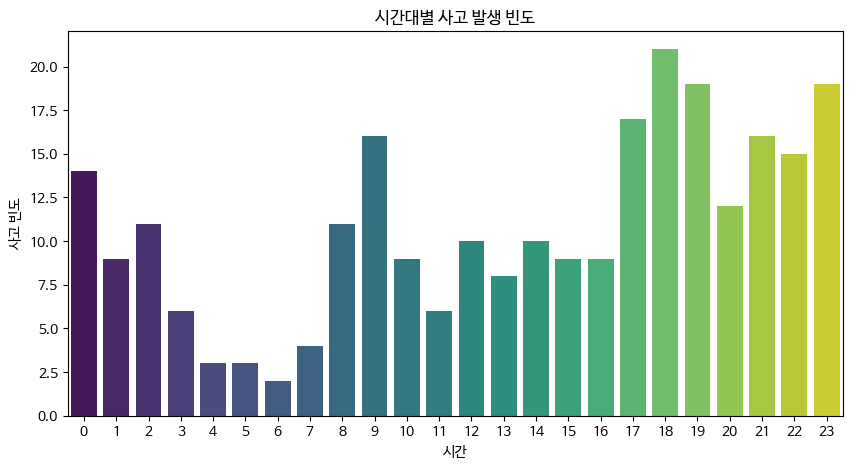

In [ ]:
# 시간대별 사고 발생 빈도
time_data = data['시간'].value_counts().sort_index()

# 시간대별 사고 빈도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=time_data.index, y=time_data.values, palette="viridis")
plt.title('시간대별 사고 발생 빈도')
plt.xlabel('시간')
plt.ylabel('사고 빈도')
plt.show()

<ipython-input-13-0e089fcd9a53>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_data.index, y=day_data.values, palette="viridis")


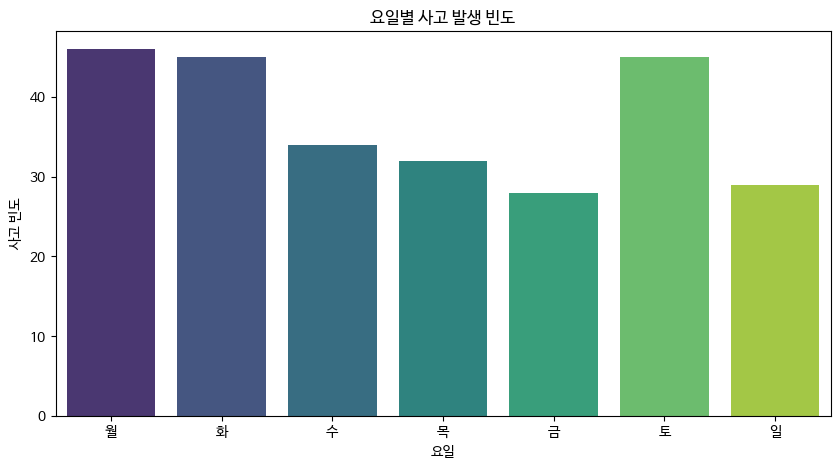

In [ ]:
# 요일별 사고 빈도
day_data = data['요일'].value_counts().sort_index()


days = ['월', '화', '수', '목', '금', '토', '일']
day_data.index = days


# 요일별 사고 빈도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=day_data.index, y=day_data.values, palette="viridis")
plt.title('요일별 사고 발생 빈도')
plt.xlabel('요일')
plt.ylabel('사고 빈도')
plt.show()

<ipython-input-14-e05d62ee0880>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_data.index, y=month_data.values, palette="viridis")


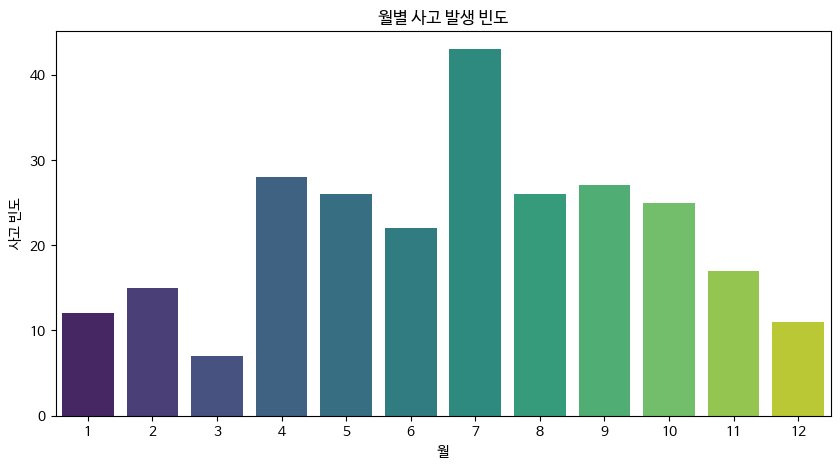

In [ ]:
# 월별 사고 빈도
month_data = data['월'].value_counts().sort_index()

# 월별 사고 빈도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=month_data.index, y=month_data.values, palette="viridis")
plt.title('월별 사고 발생 빈도')
plt.xlabel('월')
plt.ylabel('사고 빈도')
plt.show()

<ipython-input-15-eab6f5275978>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_data.index, y=weather_data.values, palette="viridis")


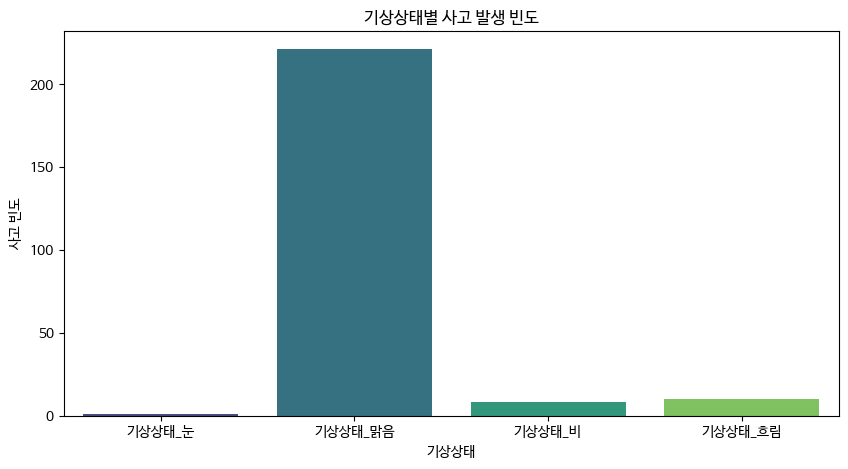

In [ ]:
# 날씨별 사고 빈도
weather = ['기상상태_눈', '기상상태_맑음', '기상상태_비', '기상상태_흐림']
weather_data = data[weather].sum()

#  사고 빈도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_data.index, y=weather_data.values, palette="viridis")
plt.title('기상상태별 사고 발생 빈도')
plt.xlabel('기상상태')
plt.ylabel('사고 빈도')
plt.show()

<ipython-input-16-88fee807f036>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_data.index, y=road_data.values, palette="viridis")


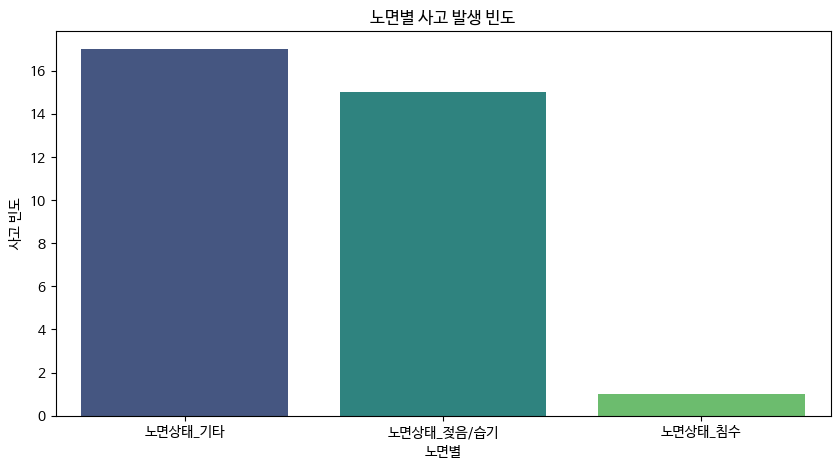

In [ ]:
# 노면 상태별 사고 빈도
road = ['노면상태_기타', '노면상태_젖음/습기', '노면상태_침수']
road_data = data[road].sum()

#  사고 빈도 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=road_data.index, y=road_data.values, palette="viridis")
plt.title('노면별 사고 발생 빈도')
plt.xlabel('노면별')
plt.ylabel('사고 빈도')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


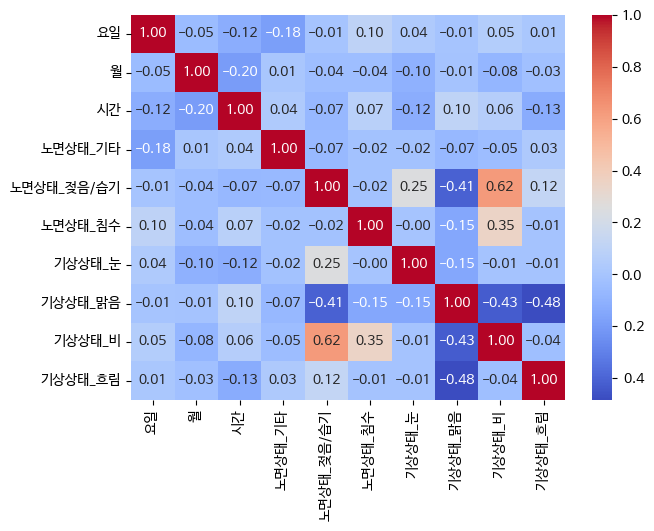

In [ ]:
data_corr = data.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

다변량 분석

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


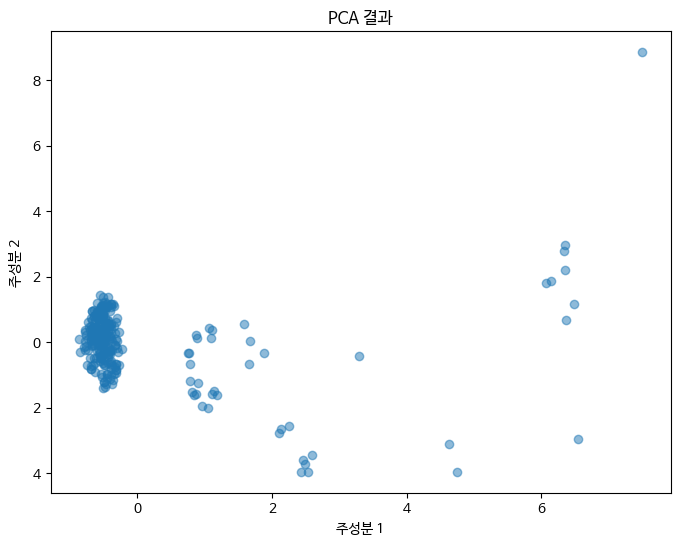

설명된 분산 비율 (요일 포함): [0.21943154 0.13890107]
각 주성분의 적재량 (요일 포함):
주성분 1 (요일 포함):
{'요일': 0.06547208424601715, '월': -0.06504629767322812, '시간': -0.0818232778184535, '노면상태_기타': -0.032847518306514056, '노면상태_젖음/습기': 0.5283627477711572, '노면상태_침수': 0.21276614896801013, '기상상태_눈': 0.18576748324322115, '기상상태_맑음': -0.5311282655369975, '기상상태_비': 0.5248985552953607, '기상상태_흐림': 0.25912634771217985}
주성분 2 (요일 포함):
{'요일': 0.05990791712224214, '월': -0.32861926141614545, '시간': 0.5233374762045859, '노면상태_기타': -0.12437285421910466, '노면상태_젖음/습기': 0.03238801834427039, '노면상태_침수': 0.39764873637666753, '기상상태_눈': -0.13190011623883816, '기상상태_맑음': 0.23868359932119923, '기상상태_비': 0.35985252534758627, '기상상태_흐림': -0.4858341888994476}


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sts = StandardScaler()
sts_data = sts.fit_transform(data) # 첫 번째 컬럼(요일)을 제외한 모든 특징


# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sts_data)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('PCA 결과')

plt.show()

# 설명된 분산 비율 출력
print(f"설명된 분산 비율 (요일 포함): {pca.explained_variance_ratio_}")

# 적재량 확인
print("각 주성분의 적재량 (요일 포함):")
features= data.columns
for i, component in enumerate(pca.components_):
    print(f"주성분 {i+1} (요일 포함):")
    print(dict(zip(features, component)))

**시간대별 사고 발생 빈도**  
사고는 저녁 시간대에 집중되어 발생하는 경향 -> 특히 18시에서 20시 사이에 가장 많이 발생  
새벽 시간대(0시에서 5시 사이)에는 사고 발생 빈도가 상대적으로 낮음  

---

**요일별 사고 발생 빈도**  
금요일에 가장 많이 발생하면 일요일에 발생 빈도가 낮음  

---

**월별 사고 발생 빈도**  
10월과 12월에 발생 빈도가 높음  
여름철과 겨울철을 비교했을 때, 겨울철에 사고 발생 빈도가 높은 것으로 보임  

---

**기상상태별 사고 발생 빈도**  
사고는 대부분 맑은 날에 발생  
비가 오거나 흐린 날에는 사고 발생 빈도가 상대적으로 낮음    
사람들이 나쁜 날씨에는 운전을 피하거나 더 조심하여 운전하는 경향이 있을 수 있음   
PM의 경우에는 비오는 날에는 타기 힘들기때문이지 않을까 추측 됨

---

**노면상태별 사고 발생 빈도**   
'기타' 노면 상태에서 사고가 대부분 발생하는데 이 기타가 정확히 뭘 뜻하는지 알 수 없음  

---

**PCA 결과**  
뚜렷하게 구분되는 몇몇 군집이 있으나, 전체적으로는 데이터 포인트들이 넓게 퍼져 있음  

---

**패턴 및 경향성**  
사고 발생은 시간대, 요일, 월에 따라 패턴이 있으며, 특히 저녁 시간대와 평일에 발생 빈도가 높음
계절적 요인과 기상 조건이 사고 발생 빈도에 영향을 미치는 것으로 보임